In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

raw_data = pd.read_csv('./Datset/Customer-Churn-Records.csv')

print(raw_data.shape)
df = raw_data.copy()
raw_data.head()

(10000, 18)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [8]:
raw_data['Exited'].value_counts()
# 1 = ลูกค้าเลิกใช้บริการ
# 0 = ลูกค้ายังคงใช้บริการ

Exited
0    7962
1    2038
Name: count, dtype: int64

<Axes: >

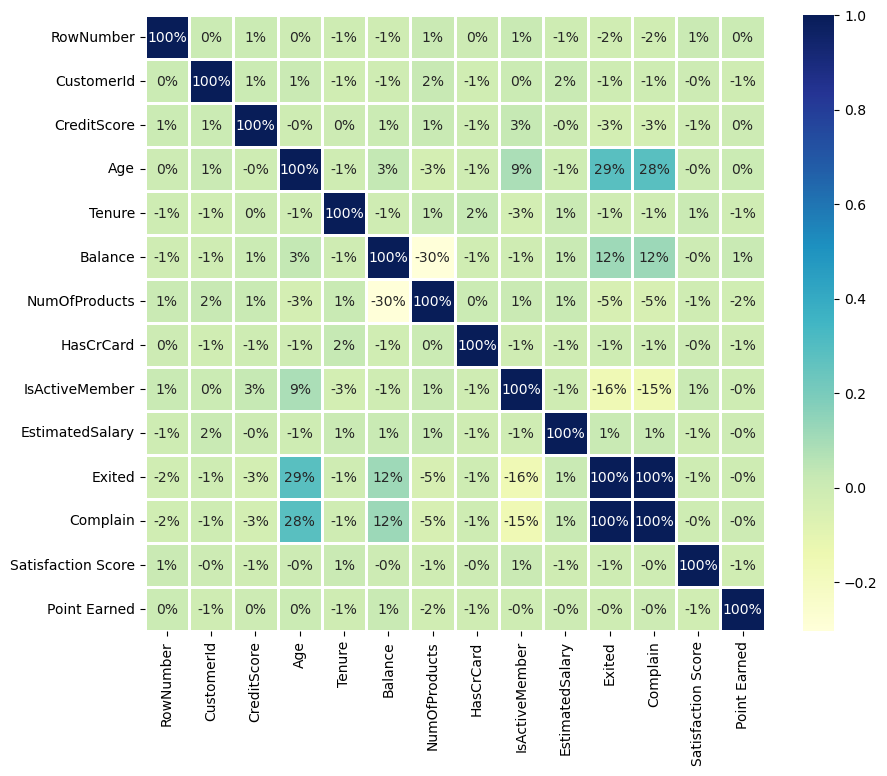

In [10]:
plt.figure(figsize=[10, 8])
sns.heatmap(data=df.corr(numeric_only=True) ,annot=True,fmt='.0%',lw=2,cmap='YlGnBu')

Exited
0    7962
1    2038
Name: count, dtype: int64


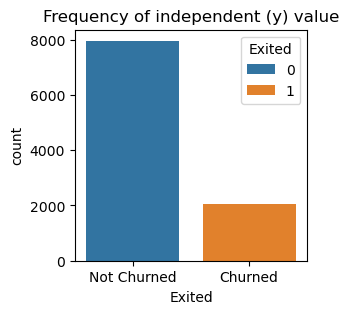

In [14]:
plt.figure(figsize=[3,3])
sns.countplot(data=df,x='Exited',hue='Exited')
plt.title('Frequency of independent (y) value')
plt.xticks([0, 1], labels=['Not Churned', 'Churned'])
print(df['Exited'].value_counts())
plt.show()

Churn Rate - Female: 25.07%
Churn Rate - Male: 16.47%


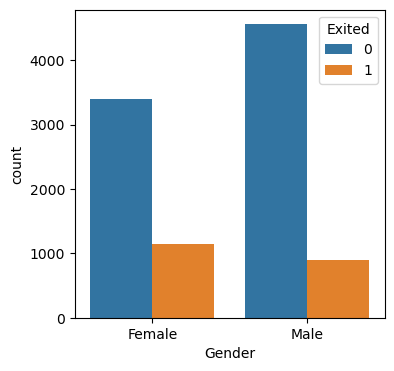

In [16]:
gender_churn_counts = df.groupby(['Gender', 'Exited']).size().unstack()
for gender in df['Gender'].unique():
    total_customers = gender_churn_counts.loc[gender].sum()
    churn_rate = gender_churn_counts.loc[gender][1] / total_customers
    print(f'Churn Rate - {gender}: {churn_rate:.2%}')
    
plt.figure(figsize=[4,4])
sns.countplot(data=df,x='Gender',hue='Exited')
plt.show()

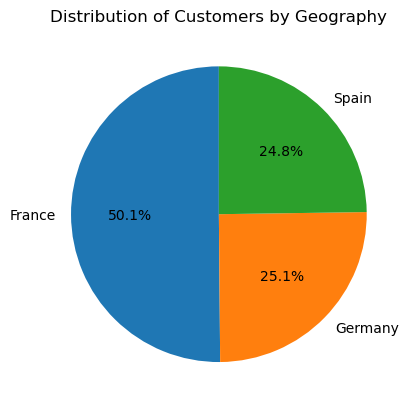

In [18]:
s = df['Geography'].value_counts()
plt.pie(s, labels=s.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Customers by Geography")
plt.show()

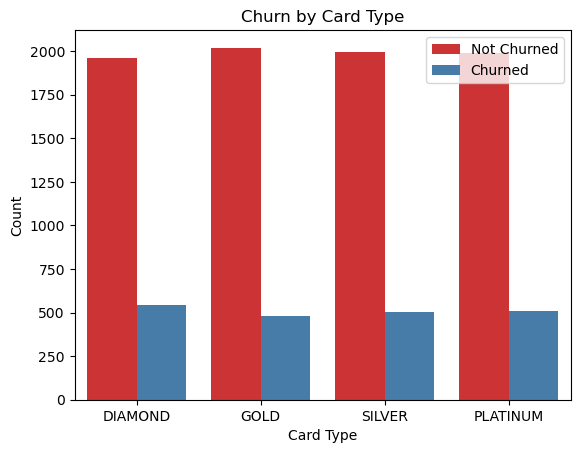

In [20]:
sns.countplot(data=df, x='Card Type', hue='Exited', palette='Set1')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Churn by Card Type')
plt.legend(['Not Churned', 'Churned'])
plt.show()

# Preprocessing Data

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

 #### Drop Non-Relevant Features Columns

In [24]:
drop_feature = ['Surname', 'RowNumber', 'CustomerId']
df = df.drop(drop_feature, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

## OneHotEncoder

In [36]:
categorical_col = df.select_dtypes(include='object').columns
numerical_col = df.select_dtypes(exclude='object').columns

for col in categorical_col:
    print(f'{col} : {df[col].unique()} | Count Unique : {df[col].nunique()}')

Geography : ['France' 'Spain' 'Germany'] | Count Unique : 3
Gender : ['Female' 'Male'] | Count Unique : 2
Card Type : ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM'] | Count Unique : 4


In [38]:
OR_encoder = OrdinalEncoder()
OH_encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

for col in categorical_col:
    if col == 'Gender':
        df[col] = OR_encoder.fit_transform(df[[col]])
    else:
        df = pd.concat([df.drop(col, axis=1), OH_encoder.fit_transform(df[[col]])], axis=1)

In [44]:
feature = ['Geography_France', 'Geography_Germany', 'Geography_Spain',
           'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']

for col in feature: 
    df[col] = df[col].astype('int64')

df['Gender'] = df['Gender'].astype('int64')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Gender              10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Point Earned        10000 non-null  int64  
 13  Geography_France    10000 non-null  int64  
 14  Geography_Germany   10000 non-null  int64  
 15  Geography_Spain     10000 non-null  int64  
 16  Card 

## Oversampling : SMOTE

In [54]:
from imblearn.over_sampling import SMOTE

X = df.drop('Exited', axis=1)
y = df['Exited']

smote = SMOTE(random_state=0)
X_sample, y_sample = smote.fit_resample(X, y)

In [56]:
df_smote = pd.DataFrame(X_sample, columns=df.drop('Exited', axis=1).columns)
df_smote['Exited'] = y_sample

df_smote.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
0               1        101348.88         1                   2   
1               1        112542.58         1                   3   
2               0        113931.57         1                   3   
3               0         93826.63         0                   5   
4               1         79084.10         0                   5   

   Point Earned  Geography_France  Geography_Germany  Geography_Spain  \
0           464                 1                  0                0   
1           456                 0                  0                1   
2           377                 1                  0                0   
3           350                 1                  0                0   
4           425                 0                  0                1   

   Card Type_DIAMOND  Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  \
0                  1               0                   0                 0   
1                  1               0                   0                 0   
2                  1               0                   0                 0   
3                  0               1                   0                 0   
4                  0               1                   0                 0   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

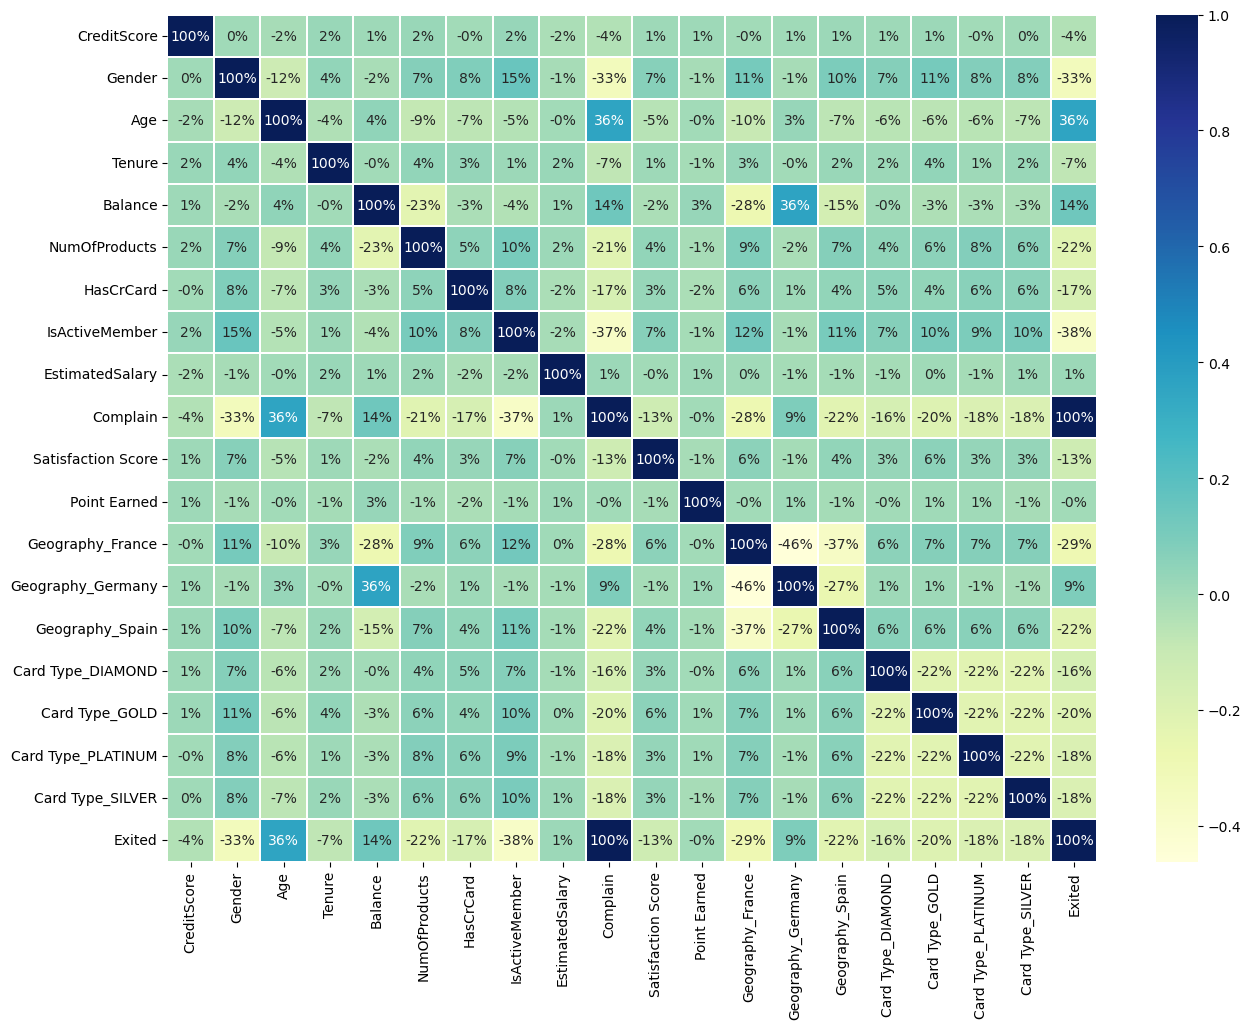

In [64]:
plt.figure(figsize=(15,11))
sns.heatmap( data=df_smote.corr() , fmt='.0%' , annot=True , lw=.2 , cmap='YlGnBu')
plt.show()

## Check Distribution

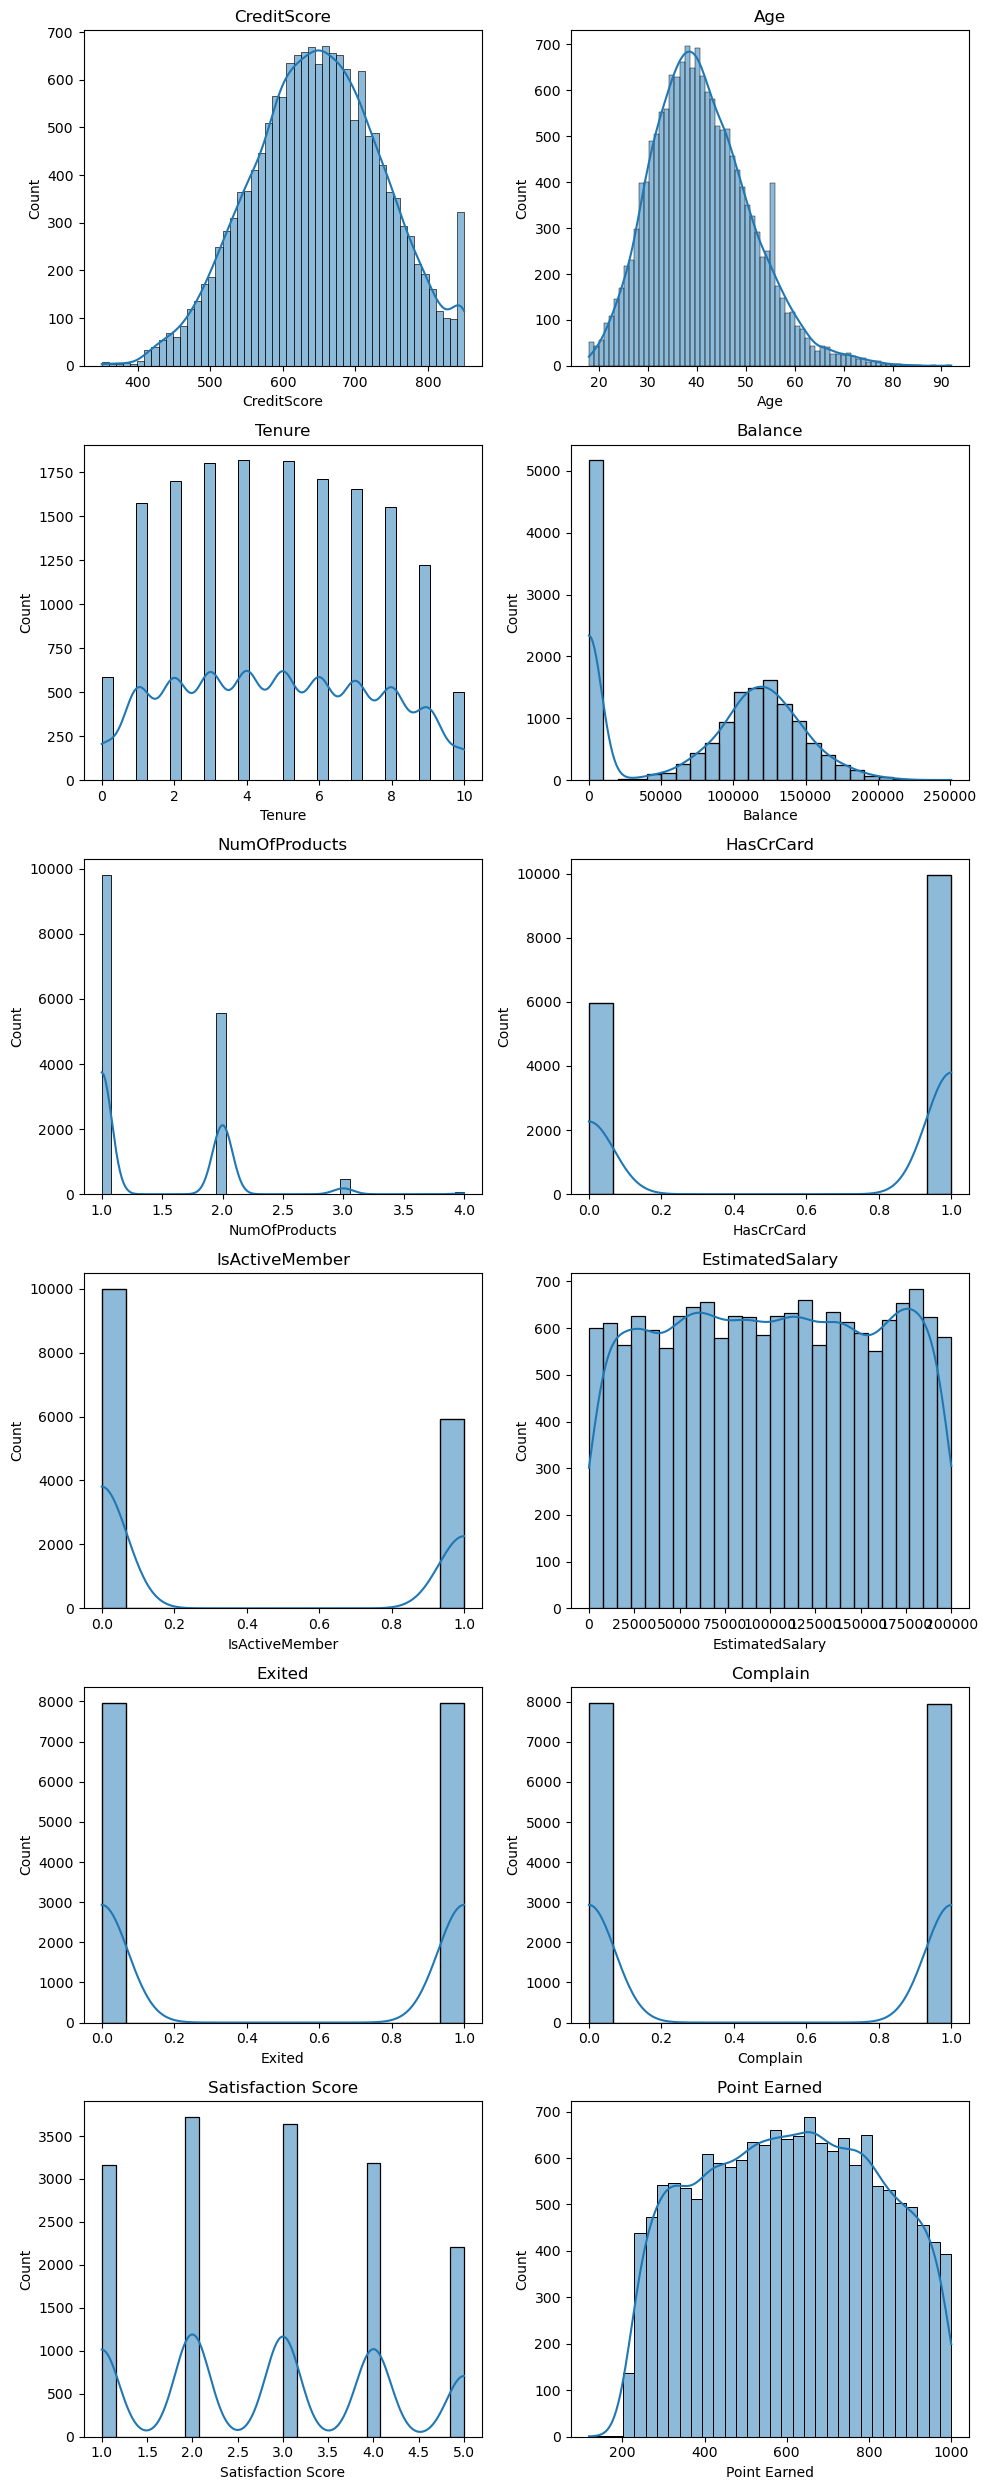

In [111]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=[10, 25])
for i, column in enumerate(numerical_col):
    row, col = divmod(i, 2)
    sns.histplot(df_smote[column], ax=axes[row, col], kde=True)
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()

In [70]:
df_smote[numerical_col].describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  15924.000000  15924.000000  15924.000000   15924.000000   15924.000000   
mean     648.128109     41.009671      4.830884   81122.932684       1.421188   
std       91.218563     10.055047      2.721810   61332.932595       0.572019   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      586.000000     34.000000      3.000000       0.000000       1.000000   
50%      649.000000     40.000000      5.000000  102872.605000       1.000000   
75%      711.000000     47.000000      7.000000  128626.704680       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

          HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  15924.000000    15924.000000     15924.000000  15924.000000   
mean       0.625973        0.372331    100497.030667      0.500000   
std        0.483886        0.483441     57610.771228      0.500016   
min        0.000000        0.000000        11.580000      0.000000   
25%        0.000000        0.000000     51273.849170      0.000000   
50%        1.000000        0.000000    100718.780000      0.500000   
75%        1.000000        1.000000    150000.187500      1.000000   
max        1.000000        1.000000    199992.480000      1.000000   

           Complain  Satisfaction Score  Point Earned  
count  15924.000000        15924.000000  15924.000000  
mean       0.499560            2.846333    606.102550  
std        0.500016            1.326851    211.310814  
min        0.000000            1.000000    119.000000  
25%        0.000000            2.000000    430.000000  
50%        0.000000            3.000000    607.000000  
75%        1.000000            4.000000    780.000000  
max        1.000000            5.000000   1000.000000

## Check Outlier

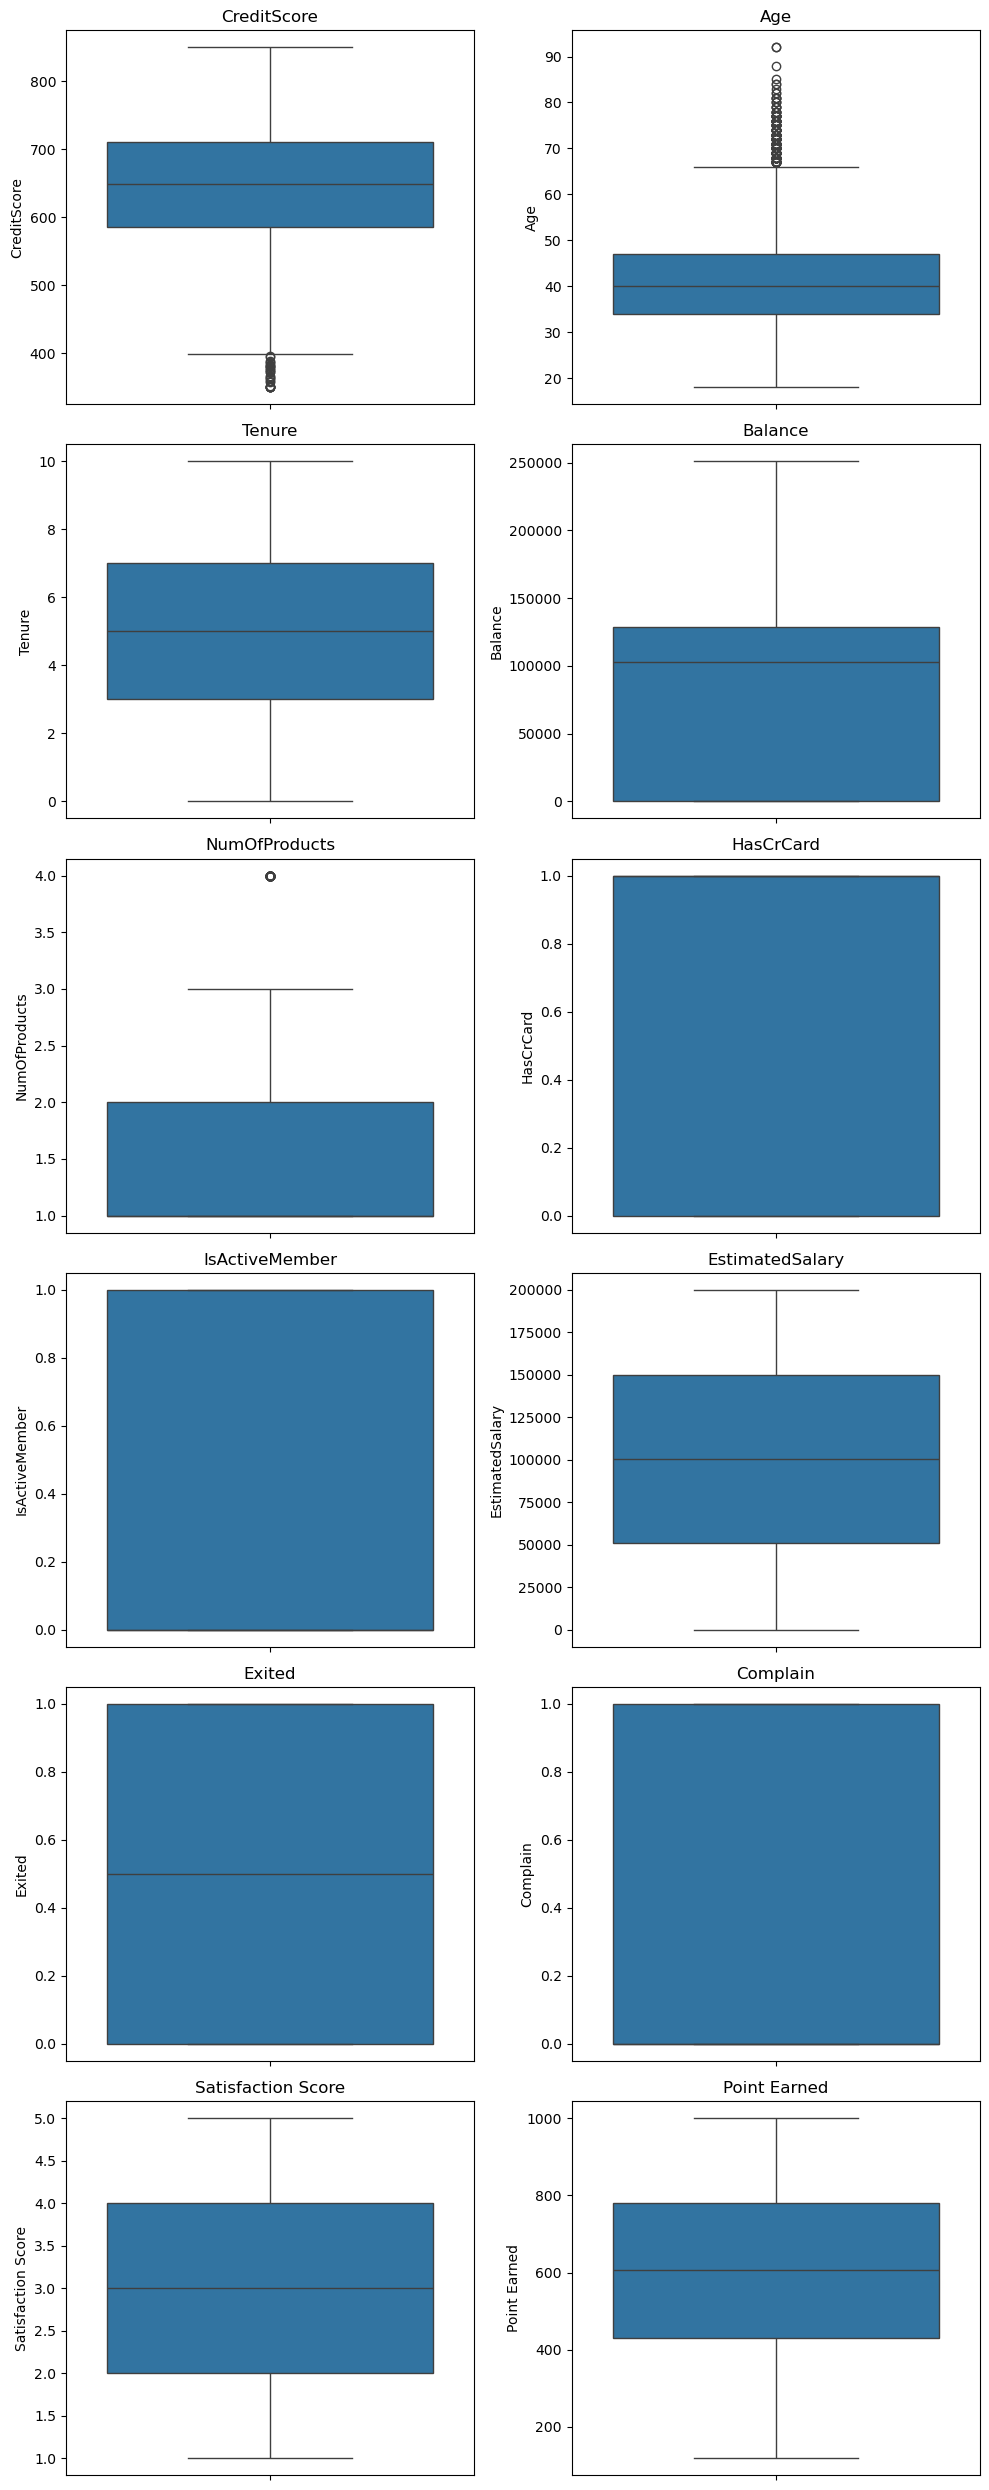

In [73]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=[10, 25])
for i, column in enumerate(numerical_col):
    row, col = divmod(i, 2)
    sns.boxplot(df_smote[column], ax=axes[row, col])
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()

## Check IQR

In [80]:
outlier_suspect_col = ['CreditScore', 'Age', 'NumOfProducts']

for col in outlier_suspect_col:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    IQR = q3 - q1
    lower_b = q1 - (IQR * 2)
    upper_b = q3 + (IQR * 2)
    print(f'{col}')
    print(f'upper_bond = {upper_b}:')
    print(f'lower_bond = {lower_b}:')
    print('-'*30)

CreditScore
upper_bond = 986.0:
lower_bond = 316.0:
------------------------------
Age
upper_bond = 68.0:
lower_bond = 8.0:
------------------------------
NumOfProducts
upper_bond = 4.0:
lower_bond = -1.0:
------------------------------


### ตัด Outliner

In [83]:
creditscore_condition = ((df_smote['CreditScore'] >= 316.0) & (df_smote['CreditScore'] <= 986.0))
age_condition = ((df_smote['Age'] >= 8.0) & (df_smote['Age'] <= 68.0))
numofproducts_condition = ((df_smote['NumOfProducts'] >= -1.0) & (df_smote['NumOfProducts'] <= 4.0))

df_no_outlier = df_smote[ creditscore_condition & age_condition & numofproducts_condition ]

In [91]:
print(f'Shape DataFrame Non Outliner : {df_no_outlier.shape}')
print(f'{df_no_outlier['Exited'].value_counts()}')
print('-'*30)
print(f'{df_no_outlier['Complain'].value_counts()}')

Shape DataFrame Non Outliner : (15739, 20)
Exited
1    7933
0    7806
Name: count, dtype: int64
------------------------------
Complain
1    7926
0    7813
Name: count, dtype: int64


# Visuazation

In [133]:
import warnings
warnings.filterwarnings('ignore')

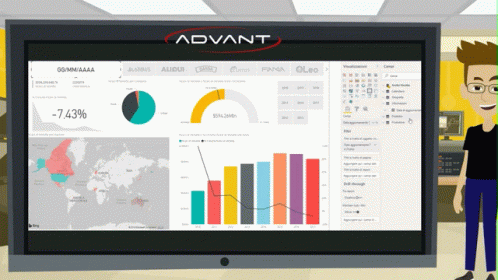

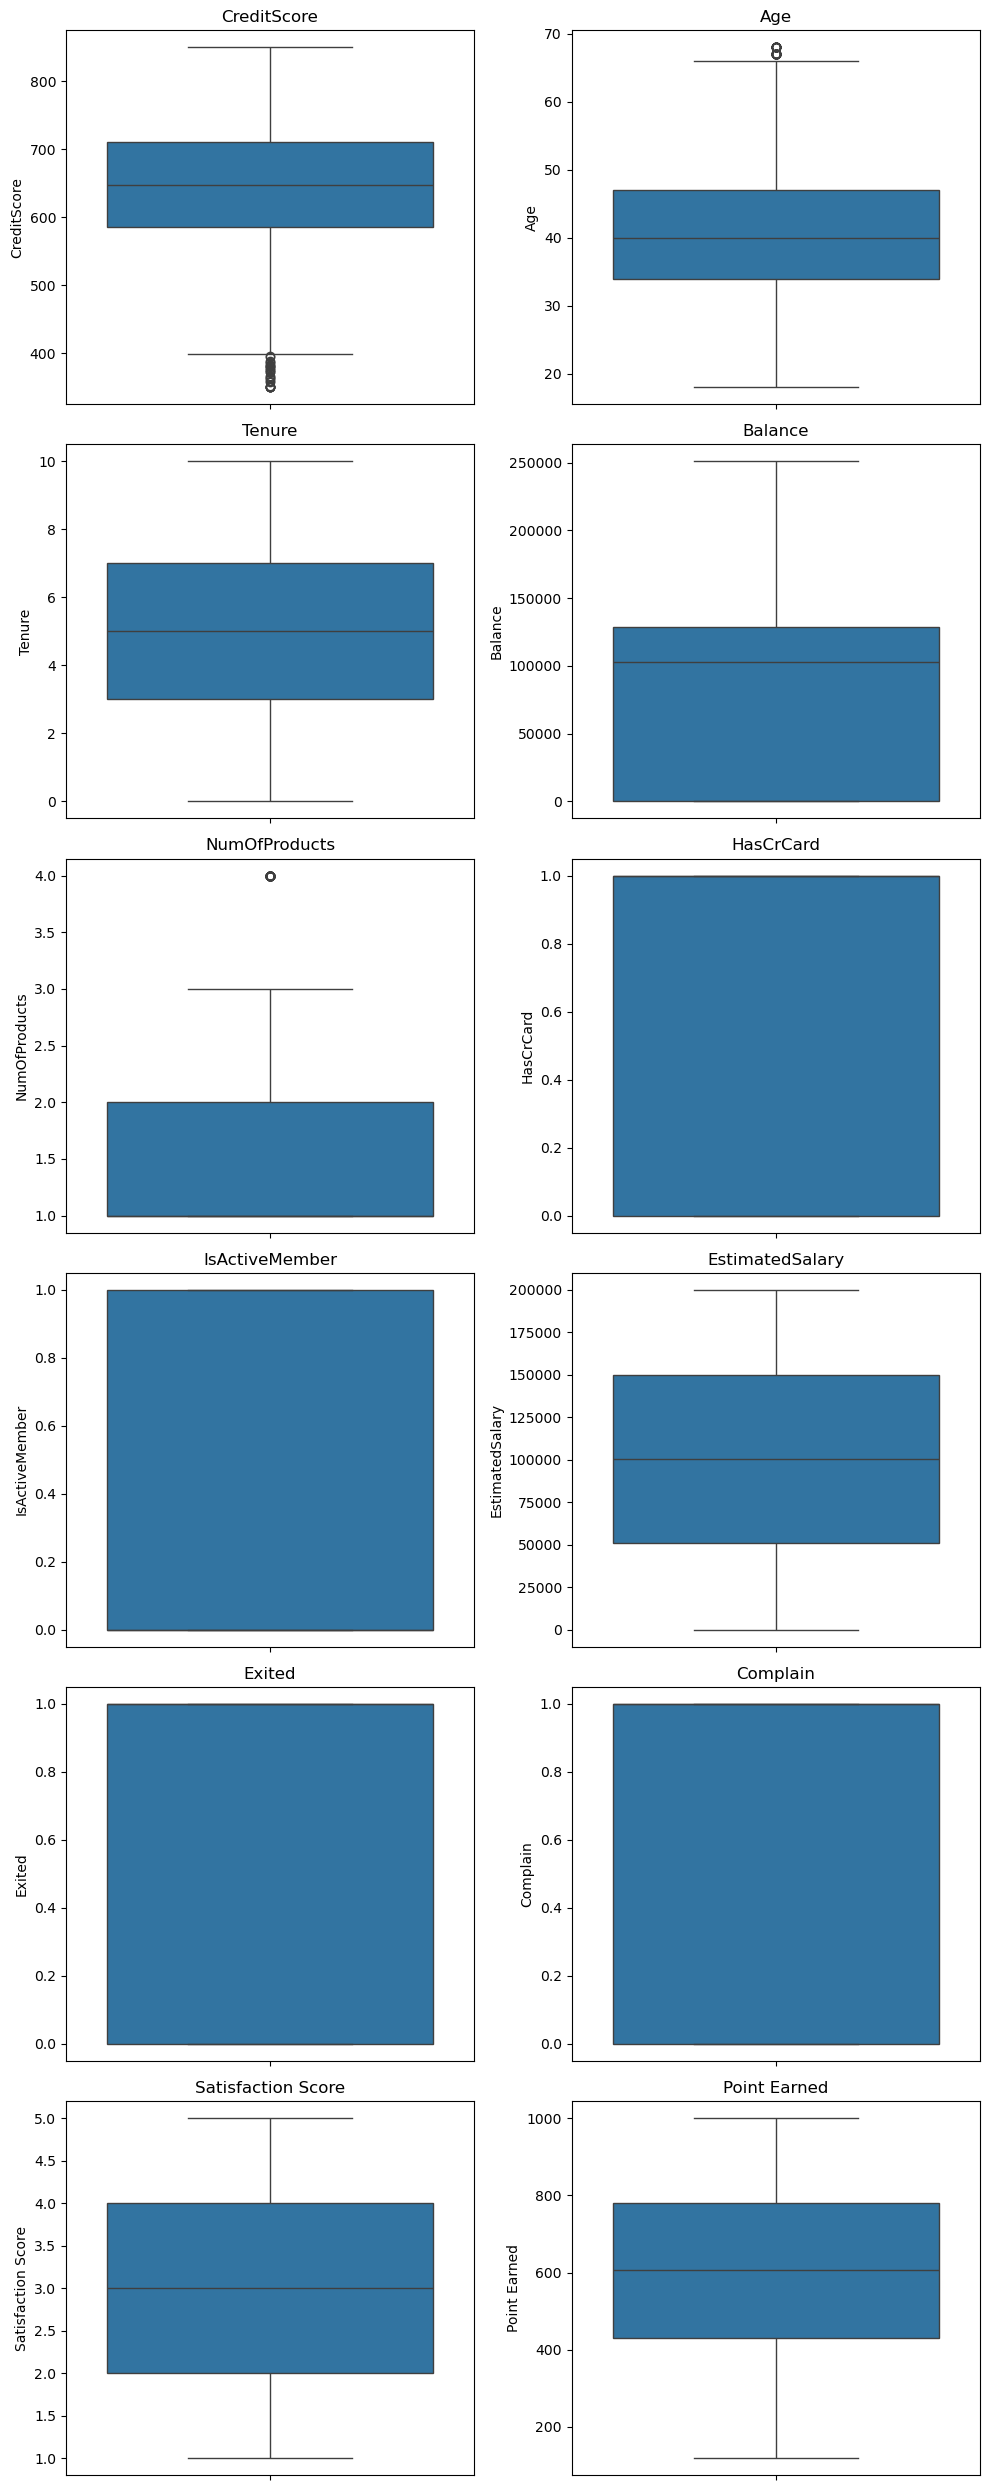

In [113]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=[10, 25])

for i, column in enumerate(numerical_col):
    row, col = divmod(i, 2)
    sns.boxplot(df_no_outlier[column], ax=axes[row, col])
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()

## Find Insight Data

### ดูช่วงอายุที่ Exited

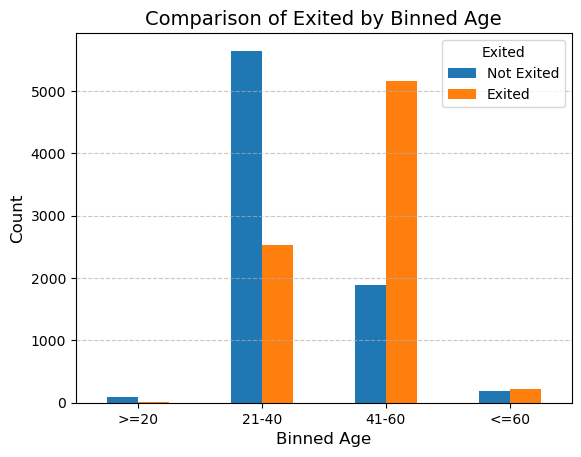

In [139]:
bins = [0, 20, 40, 60, 80]  # กำหนดช่วง
labels = ['>=20', '21-40', '41-60', '<=60']  # ชื่อช่วง
df_no_outlier['Binned-Age'] = pd.cut(df_no_outlier['Age'], bins=bins, labels=labels, right=True)

data_age = df_no_outlier.groupby(['Binned-Age'])['Exited'].value_counts().unstack()
data_age.plot(kind='bar', stacked=False)

plt.title("Comparison of Exited by Binned Age", fontsize=14)
plt.xlabel("Binned Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["Not Exited", "Exited"], title="Exited")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [141]:
data_age

Exited         0     1
Binned-Age            
>=20          84    11
21-40       5648  2537
41-60       1881  5166
<=60         193   219

### ดูจำนวน Exited ในแต่ละ Geography แยกชายหญิง เป็นกี่%

In [158]:
df_no_outlier["Geography"] = df_no_outlier[["Geography_Germany", 
                                            "Geography_Spain", 
                                            "Geography_France"]].idxmax(axis=1).str.replace("Geography_", "")

df_no_outlier['Geography']

0         France
1          Spain
2         France
3         France
4          Spain
          ...   
15919     France
15920    Germany
15921    Germany
15922     France
15923    Germany
Name: Geography, Length: 15739, dtype: object

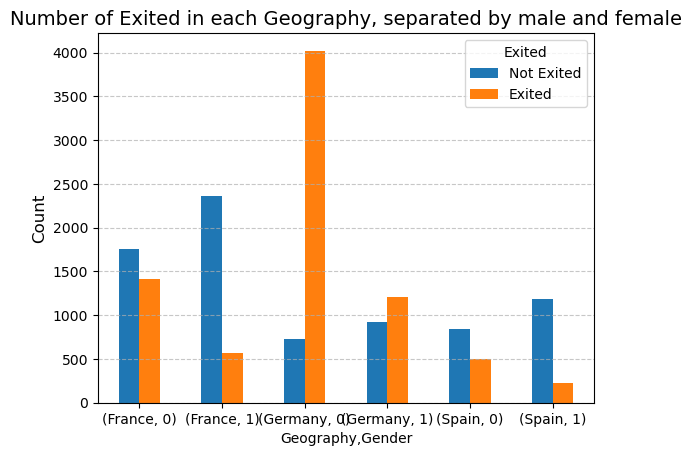

In [171]:
df_no_outlier.groupby(['Geography', 'Gender', 'Exited'])['Exited'].count().unstack().plot(kind='bar')

plt.title("Number of Exited in each Geography, separated by male and female", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.legend(["Not Exited", "Exited"], title="Exited")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Pie Chart Churn หลัง Oversampling

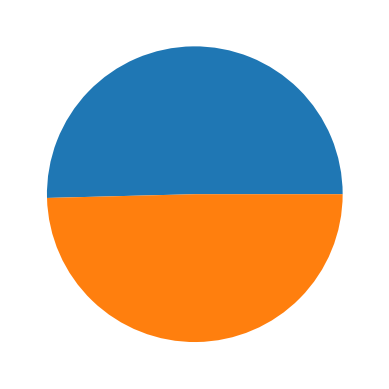

In [182]:
plt.pie(data=df_no_outlier['Exited'], x=df_no_outlier['Exited'].value_counts(),)
plt.show()

### Pie Chart Churn ก่อน Oversampling

<Axes: ylabel='count'>

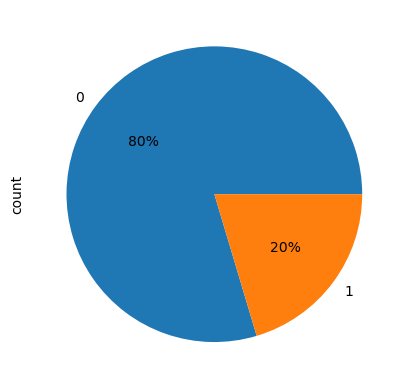

In [186]:
df['Exited'].value_counts().plot(kind='pie', autopct='%1.0f%%')

### ดู Geography กับ card type ว่ามีส่วนใดถือมากที่สุด และดูคู่กับ Exited

In [189]:
df_no_outlier["CardType"] = df_no_outlier[["Card Type_DIAMOND", 
                                           "Card Type_GOLD", 
                                           "Card Type_PLATINUM", 
                                           "Card Type_SILVER"]].idxmax(axis=1).str.replace("Card Type_", "")

df_no_outlier['CardType']

0         DIAMOND
1         DIAMOND
2         DIAMOND
3            GOLD
4            GOLD
           ...   
15919     DIAMOND
15920     DIAMOND
15921     DIAMOND
15922     DIAMOND
15923    PLATINUM
Name: CardType, Length: 15739, dtype: object

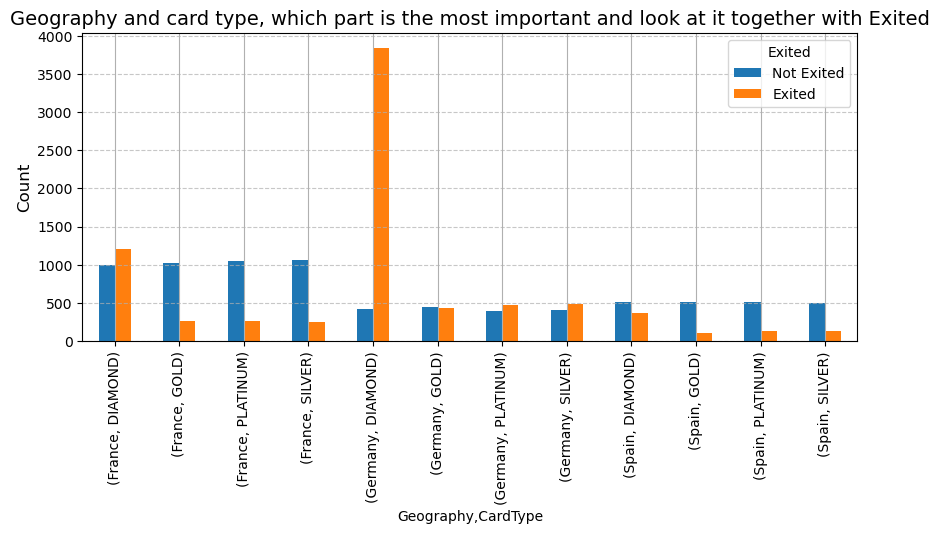

In [199]:
df_no_outlier.groupby(['Geography', 'CardType', 'Exited'])['Exited'].count().unstack().plot(kind='bar', figsize=[10, 4], grid=True)

plt.title("Geography and card type, which part is the most important and look at it together with Exited", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.legend(["Not Exited", "Exited"], title="Exited")
plt.grid(axis="y", linestyle="--", alpha=0.7)

### balance กับ NumOfProducts เป็นอย่างไร

In [204]:
df_no_outlier['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

<Axes: >

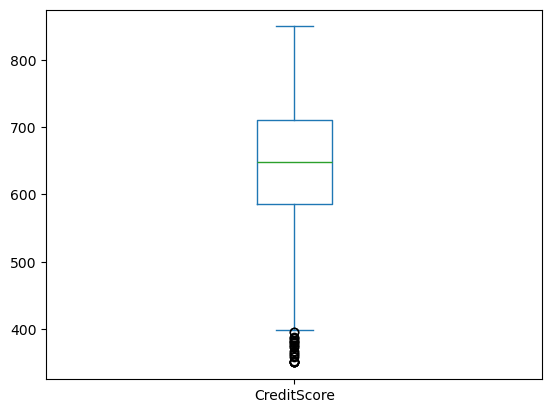

In [228]:
df_no_outlier['CreditScore'].plot(kind='box')

In [226]:
df_no_outlier['CreditScore'].mean()

647.9165131202744

In [12]:
corr = df.corr(numeric_only=True)['Exited']
corr

RowNumber            -0.016140
CustomerId           -0.006203
CreditScore          -0.026771
Age                   0.285296
Tenure               -0.013656
Balance               0.118577
NumOfProducts        -0.047611
HasCrCard            -0.006976
IsActiveMember       -0.156356
EstimatedSalary       0.012490
Exited                1.000000
Complain              0.995693
Satisfaction Score   -0.005849
Point Earned         -0.004628
Name: Exited, dtype: float64

In [14]:
risk_score = df['Age'].apply(lambda a: a * np.abs(corr['Age'])) + df['Balance'].apply(lambda a: a * np.abs(corr['Balance'])) + df['IsActiveMember'].apply(lambda a: a * np.abs(corr['IsActiveMember'])) + df['NumOfProducts'].apply(lambda a: a * np.abs(corr['NumOfProducts']))
risk_score

0          12.186418
1        9949.577394
2       18944.208073
3          11.221783
4       14895.155724
            ...     
9995       11.221783
9996     6812.899877
9997       10.474639
9998     8914.275234
9999    15439.964567
Length: 10000, dtype: float64

In [16]:
risk_score = risk_score.apply(lambda a: (a - risk_score.min()) / (risk_score.max() - risk_score.min()))
risk_score

0       0.000234
1       0.334189
2       0.636462
3       0.000201
4       0.500390
          ...   
9995    0.000201
9996    0.228778
9997    0.000176
9998    0.299397
9999    0.518699
Length: 10000, dtype: float64

### Loyalty Score

In [18]:
loyalty_score = (df['Tenure'] * 2) + (df['IsActiveMember'] * 5) + (df['NumOfProducts'] * 3) + (df['Point Earned'] / 100)

In [20]:
loyalty_score

0       16.64
1       14.56
2       28.77
3       11.50
4       16.25
        ...  
9995    19.00
9996    35.71
9997    27.64
9998    15.39
9999    20.11
Length: 10000, dtype: float64

In [26]:
df['loyalty_score'] = (df['Tenure'] * 2) + (df['IsActiveMember'] * 5) + (df['NumOfProducts'] * 3) + (df['Point Earned'] / 100)

# เรียงจากมากไปน้อย และเลือก 10 อันดับแรก
top_10_loyal_customers = df.sort_values(by='loyalty_score', ascending=False).head(10)

# แสดงผลลัพธ์
top_10_loyal_customers[['CustomerId', 'loyalty_score']]


CustomerId  loyalty_score
8590    15633194          44.59
9565    15752294          43.76
7698    15691513          43.03
4064    15689886          42.80
6000    15658577          42.78
6782    15657809          41.49
4516    15812210          41.22
4026    15606641          41.21
9215    15624180          40.95
6670    15667932          40.95

In [98]:
top_10_loyal_customers.sort_values(by=['loyalty_score'], ascending=False)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
8590       8591    15633194   Osborne          771    France  Female   41   
9565       9566    15752294      Long          582    France  Female   38   
7698       7699    15691513   Dawkins          592    France    Male   60   
4064       4065    15689886    Holden          626   Germany    Male   39   
6000       6001    15658577    Massie          629    France  Female   37   
6782       6783    15657809        Lo          585    France    Male   55   
4516       4517    15812210   Yashina          497   Germany  Female   32   
4026       4027    15606641     Beggs          762   Germany    Male   56   
9215       9216    15624180  Genovesi          584   Germany  Female   37   
6670       6671    15667932  Bellucci          758     Spain  Female   43   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
8590      10  108309.00              4          1               1   
9565       9  135979.01              4          1               1   
7698       9       0.00              4          1               1   
4064      10  132287.92              3          1               1   
6000      10   99546.25              3          0               1   
6782      10  106415.57              3          1               1   
4516       8  111537.23              4          1               1   
4026      10  100260.88              3          1               1   
9215      10  134171.80              4          1               1   
6670      10       0.00              2          1               1   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
8590        137510.41       1         1                   2    SILVER   
9565         76582.95       1         1                   2    SILVER   
7698         13614.01       1         1                   5      GOLD   
4064         51467.92       1         1                   5  PLATINUM   
6000         25136.95       1         1                   1  PLATINUM   
6782        122960.98       1         1                   1      GOLD   
4516          9497.99       1         1                   5    SILVER   
4026         77142.42       1         1                   1   DIAMOND   
9215         70927.11       1         1                   2   DIAMOND   
6670         55313.44       0         0                   2      GOLD   

      Point Earned  loyalty_score  
8590           759          44.59  
9565           876          43.76  
7698           803          43.03  
4064           880          42.80  
6000           878          42.78  
6782           749          41.49  
4516           822          41.22  
4026           721          41.21  
9215           395          40.95  
6670           995          40.95

C:\Users\USER\AppData\Local\Temp\ipykernel_20192\1336624460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_loyal_customers.sort_values(by=['loyalty_score'], ascending=False), x='loyalty_score', y='CustomerId', palette='viridis', orient='h')


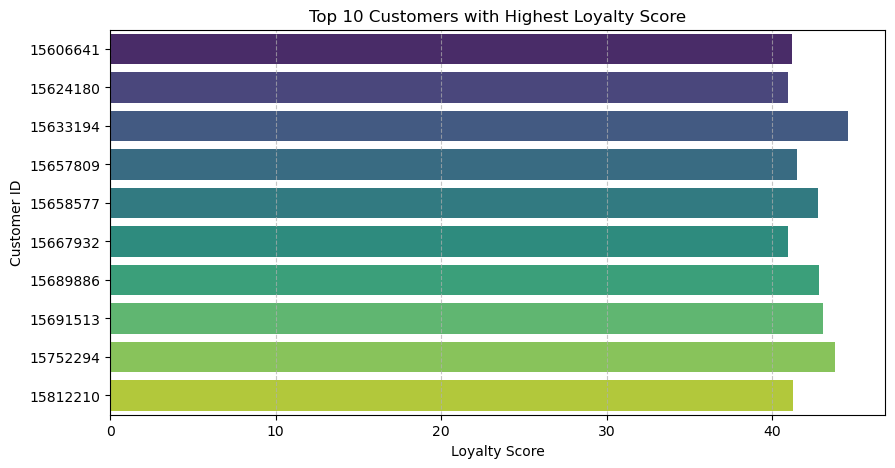

In [104]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_loyal_customers.sort_values(by=['loyalty_score'], ascending=False), x='loyalty_score', y='CustomerId', palette='viridis', orient='h')

# เพิ่มชื่อและค่ากำกับแกน
plt.xlabel('Loyalty Score')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers with Highest Loyalty Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# แสดงกราฟ
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_20192\505319293.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_loyal_customers, x='loyalty_score', y='CustomerId', palette='coolwarm')


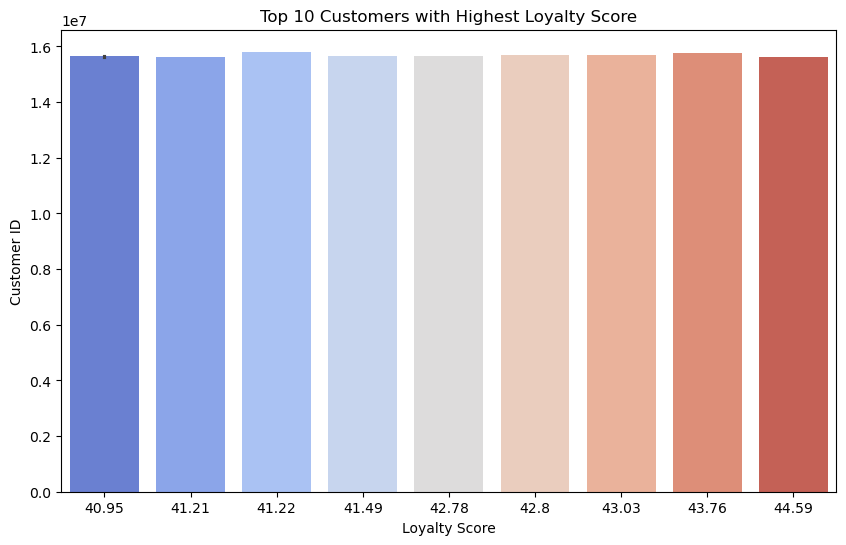

In [42]:
df['loyalty_score'] = (df['Tenure'] * 2) + (df['IsActiveMember'] * ) + (df['NumOfProducts'] * 3) + (df['Point Earned'] / 100)

# เลือก 10 อันดับลูกค้าที่มีคะแนน Loyalty สูงสุด
top_10_loyal_customers = df.sort_values(by='loyalty_score', ascending=False).head(10)

# ตั้งค่าขนาดรูป
plt.figure(figsize=(10, 6))

# สร้างกราฟแท่งแนวนอน
sns.barplot(data=top_10_loyal_customers, x='loyalty_score', y='CustomerId', palette='coolwarm')

# เพิ่มชื่อแกนและหัวข้อ
plt.xlabel('Loyalty Score')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers with Highest Loyalty Score')

# แสดงกราฟ
plt.show()


### Risk Score

In [134]:
from sklearn.preprocessing import MinMaxScaler

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลขเท่านั้น
numerical_features = ['Age', 'Balance', 'IsActiveMember', 'NumOfProducts']

# ทำ Scaling
scaler = MinMaxScaler()
df_scaled = raw_data.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

df_scaled.head()  # ตรวจสอบค่า


RowNumber  CustomerId   Surname  CreditScore Geography  Gender       Age  \
0          1    15634602  Hargrave          619    France  Female  0.324324   
1          2    15647311      Hill          608     Spain  Female  0.310811   
2          3    15619304      Onio          502    France  Female  0.324324   
3          4    15701354      Boni          699    France  Female  0.283784   
4          5    15737888  Mitchell          850     Spain  Female  0.337838   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2  0.000000       0.000000          1             1.0   
1       1  0.334031       0.000000          0             1.0   
2       8  0.636357       0.666667          1             0.0   
3       1  0.000000       0.333333          0             0.0   
4       2  0.500246       0.000000          1             1.0   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [111]:
from sklearn.preprocessing import MinMaxScaler

# เลือกเฉพาะคอลัมน์ที่ต้องการทำ Scaling
features = ['Age', 'Balance', 'IsActiveMember', 'NumOfProducts']

scaler = MinMaxScaler()
df_scaled = raw_data.copy()  
df_scaled[features] = scaler.fit_transform(df[features])


In [118]:
df_risk_score = df_scaled[features]
df_risk_score

Age   Balance  IsActiveMember  NumOfProducts
0     0.324324  0.000000             1.0       0.000000
1     0.310811  0.334031             1.0       0.000000
2     0.324324  0.636357             0.0       0.666667
3     0.283784  0.000000             0.0       0.333333
4     0.337838  0.500246             1.0       0.000000
...        ...       ...             ...            ...
9995  0.283784  0.000000             0.0       0.333333
9996  0.229730  0.228657             1.0       0.000000
9997  0.243243  0.000000             1.0       0.000000
9998  0.324324  0.299226             0.0       0.333333
9999  0.135135  0.518708             0.0       0.000000

[10000 rows x 4 columns]

In [130]:
correlations = df_scaled.corr(numeric_only=True)['Exited']

w_age = correlations['Age']
w_balance = correlations['Balance']
w_activity = correlations['IsActiveMember']
w_products = correlations['NumOfProducts']

# คำนวณ Risk Score ตามสูตร
df_scaled['Risk_Score'] = (
    w_age * df_scaled['Age'] +
    w_balance * df_scaled['Balance'] +
    w_activity * df_scaled['IsActiveMember'] +
    w_products * df_scaled['NumOfProducts']
)

# ตรวจสอบค่าที่คำนวณได้
df_scaled[['Age', 'Balance', 'IsActiveMember', 'NumOfProducts', 'Risk_Score']]

# ตรวจสอบการเรียงลำดับจากมากไปน้อย
# df_scaled_sorted = df_scaled.sort_values(by='Risk_Score', ascending=False)
# print(df_scaled_sorted[['CustomerID', 'Risk_Score']].head(10)) 


Age   Balance  IsActiveMember  NumOfProducts  Risk_Score
0     0.324324  0.000000             1.0       0.000000   -0.063827
1     0.310811  0.334031             1.0       0.000000   -0.028074
2     0.324324  0.636357             0.0       0.666667    0.136245
3     0.283784  0.000000             0.0       0.333333    0.065092
4     0.337838  0.500246             1.0       0.000000   -0.000654
...        ...       ...             ...            ...         ...
9995  0.283784  0.000000             0.0       0.333333    0.065092
9996  0.229730  0.228657             1.0       0.000000   -0.063701
9997  0.243243  0.000000             1.0       0.000000   -0.086959
9998  0.324324  0.299226             0.0       0.333333    0.112140
9999  0.135135  0.518708             0.0       0.000000    0.100060

[10000 rows x 5 columns]